# Business Understanding:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

In [108]:
##import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
boom=pd.read_csv(r'F:\Upgrad\ML1 LR\ML\day.csv')

## Understanding and visualizing data

In [3]:
#looking at first five rows
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
## checking for null values
boom.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
boom.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

- No null values present in data set

In [7]:
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
### lets rename some columns
boom.rename(columns={'dteday':'date','yr':'year','mnth':'month','temp':'temparature','hum':'humidity','cnt':'count'},inplace=True)


In [9]:
boom.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
## make changes to season,month,holiday,weekday,workingday,weathersit
boom['season']=boom['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
#boom['year']=boom['year'].map({0: 2018, 1:2019})
boom['month']=boom['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
boom['weekday']=boom['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
boom['weathersit']=boom['weathersit'].map({1: 'Clear',2:' Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})

In [11]:
boom.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


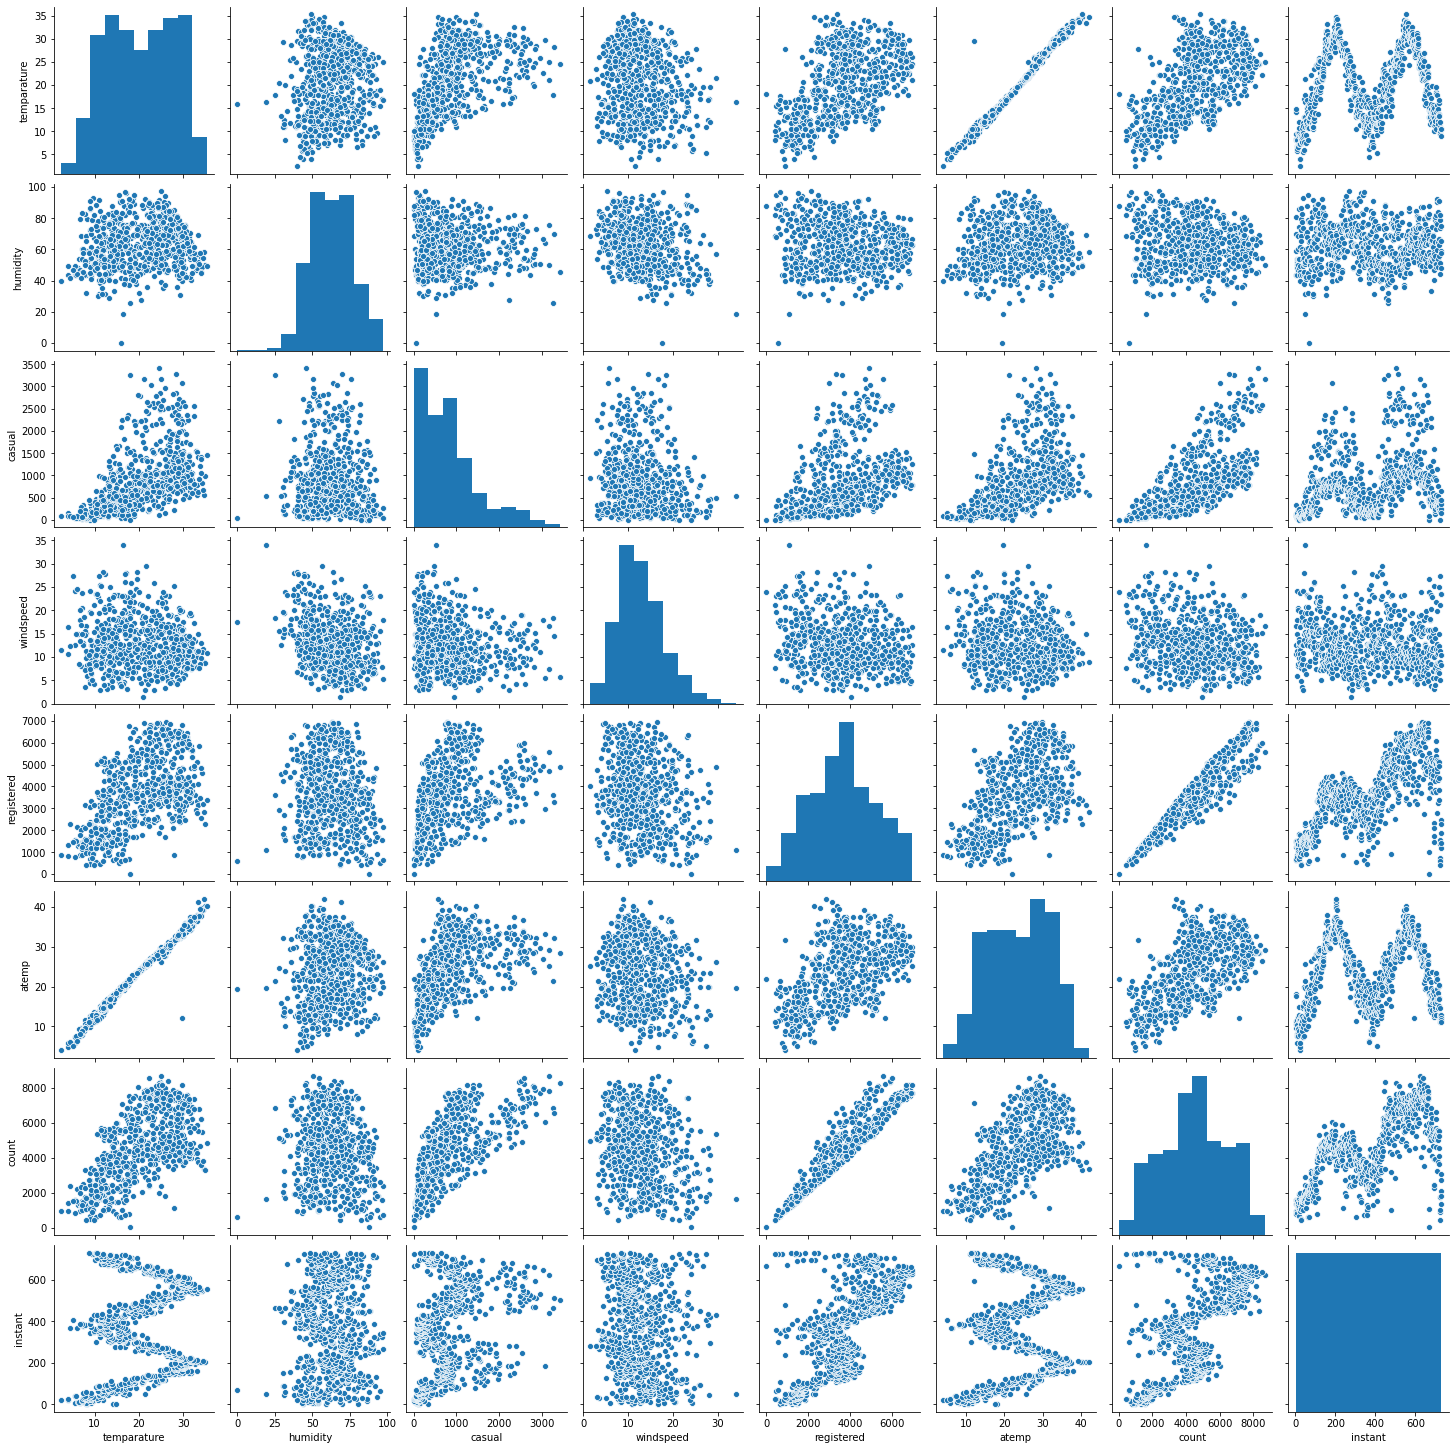

In [12]:
##lets visualize the numeric data
#plt.figure(figsize=(6,7))
sns.pairplot(boom, vars=["temparature", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

- Bike rentals are more corelated with temparature

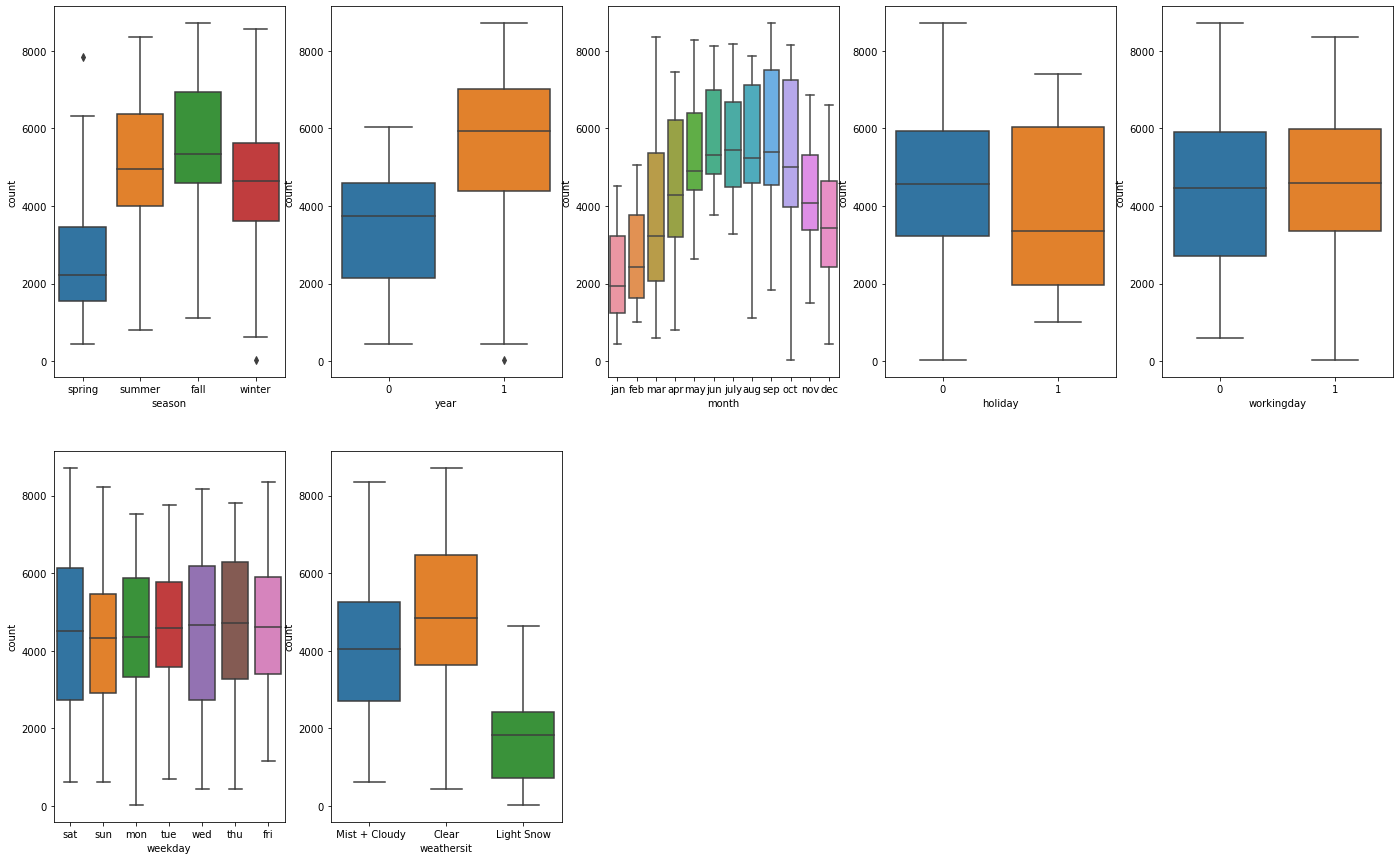

In [13]:
#lets visualize categorical data
plt.figure(figsize=(24,15))
plt.subplot(2,5,1)
sns.boxplot(x='season',y='count',data=boom)
plt.subplot(2,5,2)
sns.boxplot(x='year',y='count',data=boom)
plt.subplot(2,5,3)
sns.boxplot(x='month',y='count',data=boom)
plt.subplot(2,5,4)
sns.boxplot(x='holiday',y='count',data=boom)
plt.subplot(2,5,5)
sns.boxplot(x='workingday',y='count',data=boom)
plt.subplot(2,5,6)
sns.boxplot(x='weekday',y='count',data=boom)
plt.subplot(2,5,7)
sns.boxplot(x='weathersit',y='count',data=boom)
plt.show()

- bike rentals are more in fall and summer season
- bike rentals are more in the year 2019 than 2018
- bike rentals are more in non holiday days
- biuke rentals are more in sat,wed,thu
- bike rentals are more in few clouds(clear)

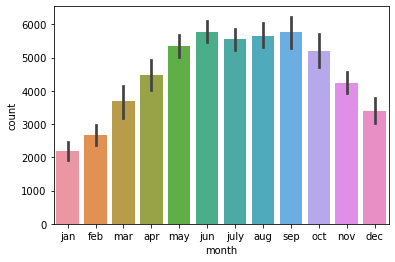

In [14]:
##bart plot
sns.barplot(x='month',y='count',data=boom)
plt.show()

- bike rentals are more in may,jun,sep when compared with other months

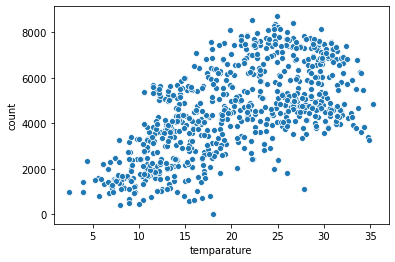

In [15]:
##scatter plot

sns.scatterplot(x='temparature',y='count',data=boom)

<Figure size 432x288 with 0 Axes>

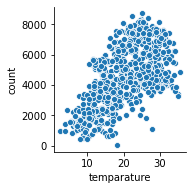

<Figure size 432x288 with 0 Axes>

In [16]:
sns.pairplot(x_vars='temparature',y_vars='count',data=boom)
plt.figure(figsize=(6,4))

- temparature is highly corelated with count

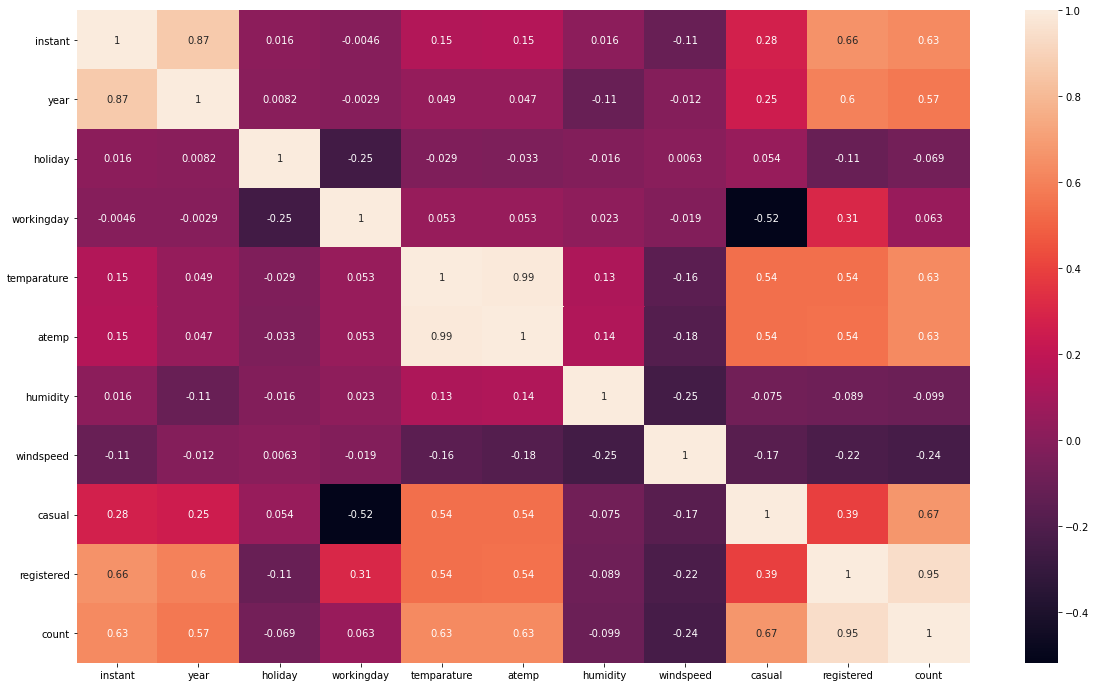

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(boom.corr(),annot=True)


- from above heatmap we can say that instant,year,temparature,atemp,casual,registered are corelated with count variable

In [18]:
##lets drop unnecessary columns
var=['date','atemp','instant','casual','registered']
boom=boom.drop(var,axis=1)

In [19]:
boom.head()

,season,year,month,holiday,weekday,workingday,weathersit,temparature,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


## preparing data for modelling

In [20]:
## creating dummy variables 
season=pd.get_dummies(boom['season'],drop_first=True)
months=pd.get_dummies(boom['month'],drop_first=True)
weekday=pd.get_dummies(boom['weekday'],drop_first=True)
weathersit=pd.get_dummies(boom['weathersit'],drop_first=True)

In [21]:
boom=pd.concat([season,months,weekday,weathersit,boom],axis=1)

In [22]:
boom.head()

,spring,summer,winter,aug,dec,feb,jan,july,jun,mar,...,year,month,holiday,weekday,workingday,weathersit,temparature,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
boom.shape

(730, 33)

In [24]:
##lets drop categorical columns
boom.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [25]:
boom.head()

,spring,summer,winter,aug,dec,feb,jan,july,jun,mar,...,wed,Clear,Light Snow,year,holiday,workingday,temparature,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,9.305237,43.6957,12.522300,1600


In [26]:
boom.shape

(730, 29)

In [27]:
##train_test_split
boom_train,boom_test=train_test_split(boom,train_size=0.8,random_state=100)

In [28]:
boom_train.shape

(584, 29)

In [29]:
boom_test.shape

(146, 29)

In [30]:
##scaling using normalisation(min/max)
scaler=MinMaxScaler()
var=['temparature','humidity','windspeed','count']
boom_train[var]=scaler.fit_transform(boom_train[var])
boom_train.head()

,spring,summer,winter,aug,dec,feb,jan,july,jun,mar,...,wed,Clear,Light Snow,year,holiday,workingday,temparature,humidity,windspeed,count
367,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0.113228,0.454701,0.695175,0.254717
648,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0.468352,0.477458,0.299450,0.868385
44,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.443431,0.387290,0.807474,0.217556
705,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.326094,0.787463,0.189819,0.573631
379,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0.133996,0.431945,0.449210,0.263346


In [31]:
boom_train.describe()

,spring,summer,winter,aug,dec,feb,jan,july,jun,mar,...,wed,Clear,Light Snow,year,holiday,workingday,temparature,humidity,windspeed,count
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,...,0.154110,0.630137,0.027397,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792
std,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,...,0.361363,0.483181,0.163378,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837
75%,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training model

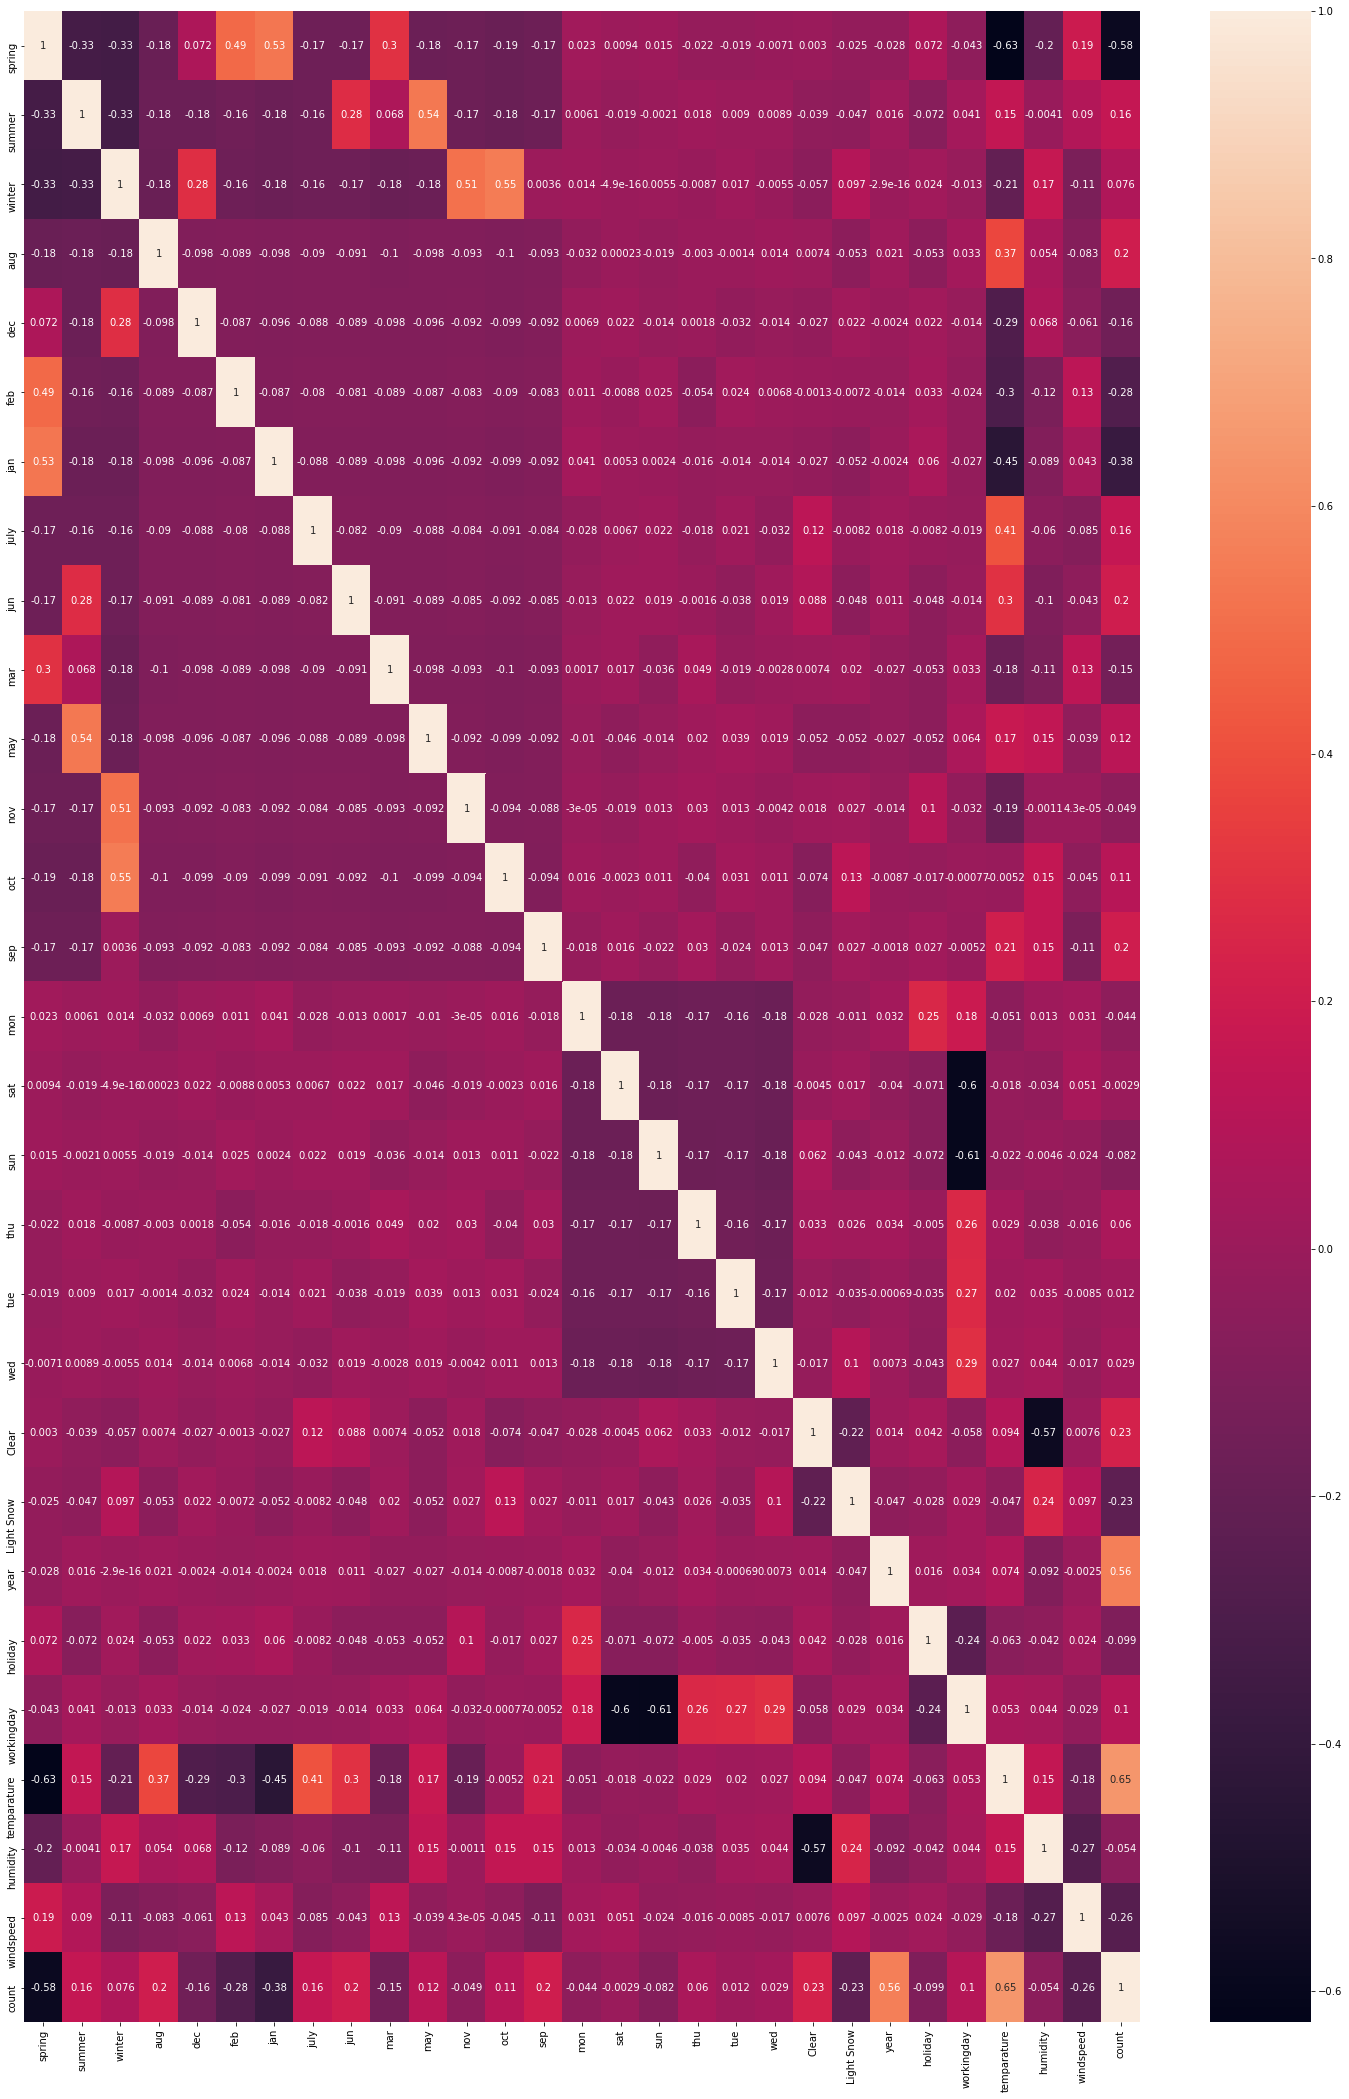

In [32]:
plt.figure(figsize=(25,37))
sns.heatmap(boom_train.corr(),annot=True)

- here we can see that temparature,year,clear(weather),sep,aug are corelated with count variables

In [33]:
boom_train.shape

(584, 29)

In [34]:
## x_train,y_train
y_train=boom_train.pop('count')
X_train=boom_train

In [35]:
y_train.head()

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: count, dtype: float64

In [36]:
X_train.head()

,spring,summer,winter,aug,dec,feb,jan,july,jun,mar,...,tue,wed,Clear,Light Snow,year,holiday,workingday,temparature,humidity,windspeed
367,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0.113228,0.454701,0.695175
648,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0.468352,0.477458,0.299450
44,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0.443431,0.387290,0.807474
705,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.326094,0.787463,0.189819
379,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0.133996,0.431945,0.449210


### building a linear model

## RFE
  - Recursive feature elimination

In [37]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', False, 4),
 ('july', True, 1),
 ('jun', False, 12),
 ('mar', False, 11),
 ('may', False, 8),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 7),
 ('wed', False, 14),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temparature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'workingday', 'temparature',
       'humidity', 'windspeed'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
X_train_rfe .head()

,spring,summer,winter,july,sep,sat,sun,Clear,Light Snow,year,holiday,workingday,temparature,humidity,windspeed
367,1,0,0,0,0,0,0,1,0,1,0,1,0.113228,0.454701,0.695175
648,0,0,1,0,0,0,0,1,0,1,0,1,0.468352,0.477458,0.299450
44,1,0,0,0,0,0,0,1,0,0,0,1,0.443431,0.387290,0.807474
705,0,0,1,0,0,0,0,0,0,1,0,1,0.326094,0.787463,0.189819
379,1,0,0,0,0,0,1,1,0,1,0,0,0.133996,0.431945,0.449210


In [42]:
X_train_rfe_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     233.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.36e-225
Time:                        14:36:06   Log-Likelihood:                 599.73
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     569   BIC:                            -1104.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
spring         -0.0588      0.019     -3.107      0.002      -0.096      -0.022
summer          0.0547      0.014      4.032      0.000       0.028       0.081
winter          0.1035      0.015      6.700      0.000       0.073       0.134
july           -0.0539      0.017     -3.188      0.002      -0.087      -0.021
sep             0.0761      0.015      5.027      0.000       0.046       0.106
sat             0.2343      0.036      6.448      0.000       0.163       0.306
sun             0.1747      0.037      4.744      0.000       0.102       0.247
Clear           0.0554      0.010      5.730      0.000       0.036       0.074
Light Snow     -0.1943      0.024     -8.262      0.000      -0.241      -0.148
year            0.2262      0.007     30.625      0.000       0.212       0.241
holiday         0.1144      0.042      2.727      0.007       0.032       0.197
workingday      0.2247      0.036      6.298      0.000       0.155       0.295
temparature     0.5398      0.030     17.734      0.000       0.480       0.600
humidity       -0.1609      0.035     -4.590      0.000      -0.230      -0.092
windspeed      -0.1803      0.024     -7.630      0.000      -0.227      -0.134
==============================================================================
Omnibus:                       80.263   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.521
Skew:                          -0.721   Prob(JB):                     2.12e-43
Kurtosis:                       5.449   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

  ## calucalting VIF

In [44]:
X_train_rfe_sm.columns

Index(['const', 'spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun',
       'Clear', 'Light Snow', 'year', 'holiday', 'workingday', 'temparature',
       'humidity', 'windspeed'],
      dtype='object')

In [45]:
X_train_rfe_new=X_train_rfe_sm.drop(['const'],axis=1)

In [46]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'workingday', 'temparature',
       'humidity', 'windspeed'],
      dtype='object')

In [47]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
11,workingday,64.41
6,sun,15.84
5,sat,15.08
0,spring,5.11
10,holiday,3.66
12,temparature,3.56
2,winter,3.39
1,summer,2.59
13,humidity,1.93
7,Clear,1.65


 - workingday have hig vif and low p value,it is insignificant so drop it

In [48]:
X_train_rfe_new=X_train_rfe_new.drop(['workingday'],axis=1)

In [49]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'temparature', 'humidity',
       'windspeed'],
      dtype='object')

In [50]:
##lets rebuild model again
X_train_rfe_new1=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new1)
lr_model=lr.fit()

In [51]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     233.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.36e-225
Time:                        14:36:06   Log-Likelihood:                 599.73
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     569   BIC:                            -1104.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2247      0.036      6.298      0.000       0.155       0.295
spring         -0.0588      0.019     -3.107      0.002      -0.096      -0.022
summer          0.0547      0.014      4.032      0.000       0.028       0.081
winter          0.1035      0.015      6.700      0.000       0.073       0.134
july           -0.0539      0.017     -3.188      0.002      -0.087      -0.021
sep             0.0761      0.015      5.027      0.000       0.046       0.106
sat             0.0096      0.010      0.927      0.354      -0.011       0.030
sun            -0.0500      0.010     -4.843      0.000      -0.070      -0.030
Clear           0.0554      0.010      5.730      0.000       0.036       0.074
Light Snow     -0.1943      0.024     -8.262      0.000      -0.241      -0.148
year            0.2262      0.007     30.625      0.000       0.212       0.241
holiday        -0.1102      0.023     -4.886      0.000      -0.155      -0.066
temparature     0.5398      0.030     17.734      0.000       0.480       0.600
humidity       -0.1609      0.035     -4.590      0.000      -0.230      -0.092
windspeed      -0.1803      0.024     -7.630      0.000      -0.227      -0.134
==============================================================================
Omnibus:                       80.263   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.521
Skew:                          -0.721   Prob(JB):                     2.12e-43
Kurtosis:                       5.449   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_rfe_new=X_train_rfe_new1.drop(['const'],axis=1)

In [53]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
12,humidity,22.80
11,temparature,18.62
0,spring,4.76
13,windspeed,4.67
2,winter,3.61
7,Clear,3.45
1,summer,2.91
9,year,2.08
3,july,1.61
4,sep,1.38


 - sat is insignificant so drop it

In [54]:
X_train_rfe_new=X_train_rfe_new.drop(['sat'],axis=1)

In [55]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'temparature', 'humidity',
       'windspeed'],
      dtype='object')

In [56]:
##Lets rebuild model again
X_train_rfe_new2=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new2)

In [57]:
lr_model=lr.fit()

In [58]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     251.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.18e-226
Time:                        14:36:06   Log-Likelihood:                 599.29
No. Observations:                 584   AIC:                            -1171.
Df Residuals:                     570   BIC:                            -1109.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2274      0.036      6.395      0.000       0.158       0.297
spring         -0.0590      0.019     -3.119      0.002      -0.096      -0.022
summer          0.0545      0.014      4.017      0.000       0.028       0.081
winter          0.1034      0.015      6.696      0.000       0.073       0.134
july           -0.0536      0.017     -3.173      0.002      -0.087      -0.020
sep             0.0764      0.015      5.050      0.000       0.047       0.106
sun            -0.0517      0.010     -5.103      0.000      -0.072      -0.032
Clear           0.0553      0.010      5.724      0.000       0.036       0.074
Light Snow     -0.1942      0.024     -8.259      0.000      -0.240      -0.148
year            0.2259      0.007     30.617      0.000       0.211       0.240
holiday        -0.1121      0.022     -4.989      0.000      -0.156      -0.068
temparature     0.5392      0.030     17.720      0.000       0.479       0.599
humidity       -0.1618      0.035     -4.618      0.000      -0.231      -0.093
windspeed      -0.1794      0.024     -7.600      0.000      -0.226      -0.133
==============================================================================
Omnibus:                       76.710   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.686
Skew:                          -0.682   Prob(JB):                     1.44e-42
Kurtosis:                       5.461   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_train_rfe_new=X_train_rfe_new2.drop(['const'],axis=1)

In [60]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'temparature', 'humidity',
       'windspeed'],
      dtype='object')

In [61]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
11,humidity,22.77
10,temparature,18.61
0,spring,4.76
12,windspeed,4.64
2,winter,3.60
6,Clear,3.45
1,summer,2.91
8,year,2.08
3,july,1.61
4,sep,1.38


 - humidity is insignificant so drop it

In [62]:
X_train_rfe_new=X_train_rfe_new.drop(['humidity'],axis=1)

In [63]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'temparature', 'windspeed'],
      dtype='object')

In [64]:
##Lets rebuild model again
X_train_rfe_new3=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new3)
lr_model=lr.fit()

In [65]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     261.6
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          6.53e-223
Time:                        14:36:06   Log-Likelihood:                 588.56
No. Observations:                 584   AIC:                            -1151.
Df Residuals:                     571   BIC:                            -1094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1175      0.027      4.370      0.000       0.065       0.170
spring         -0.0665      0.019     -3.466      0.001      -0.104      -0.029
summer          0.0503      0.014      3.655      0.000       0.023       0.077
winter          0.0914      0.015      5.900      0.000       0.061       0.122
july           -0.0483      0.017     -2.815      0.005      -0.082      -0.015
sep             0.0708      0.015      4.612      0.000       0.041       0.101
sun            -0.0540      0.010     -5.240      0.000      -0.074      -0.034
Clear           0.0815      0.008     10.231      0.000       0.066       0.097
Light Snow     -0.2139      0.024     -9.088      0.000      -0.260      -0.168
year            0.2305      0.007     30.975      0.000       0.216       0.245
holiday        -0.1124      0.023     -4.914      0.000      -0.157      -0.067
temparature     0.5068      0.030     16.820      0.000       0.448       0.566
windspeed      -0.1478      0.023     -6.429      0.000      -0.193      -0.103
==============================================================================
Omnibus:                       75.509   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.321
Skew:                          -0.676   Prob(JB):                     2.11e-41
Kurtosis:                       5.423   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_rfe_new=X_train_rfe_new3.drop(['const'],axis=1)

In [67]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'temparature', 'windspeed'],
      dtype='object')

In [68]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
10,temparature,5.91
11,windspeed,4.63
6,Clear,2.87
1,summer,2.23
0,spring,2.21
8,year,2.07
2,winter,1.80
3,july,1.61
4,sep,1.33
5,sun,1.19


- windspeed is insignificant drop it

In [69]:
X_train_rfe_new=X_train_rfe_new.drop(['windspeed'],axis=1)

In [70]:
##Lets rebuild model again
X_train_rfe_new4=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new4)
lr_model=lr.fit()

In [71]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     263.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.71e-215
Time:                        14:36:06   Log-Likelihood:                 568.16
No. Observations:                 584   AIC:                            -1112.
Df Residuals:                     572   BIC:                            -1060.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0683      0.027      2.559      0.011       0.016       0.121
spring         -0.0742      0.020     -3.745      0.000      -0.113      -0.035
summer          0.0428      0.014      3.015      0.003       0.015       0.071
winter          0.0948      0.016      5.918      0.000       0.063       0.126
july           -0.0470      0.018     -2.649      0.008      -0.082      -0.012
sep             0.0753      0.016      4.747      0.000       0.044       0.106
sun            -0.0523      0.011     -4.909      0.000      -0.073      -0.031
Clear           0.0792      0.008      9.616      0.000       0.063       0.095
Light Snow     -0.2320      0.024     -9.593      0.000      -0.279      -0.184
year            0.2299      0.008     29.862      0.000       0.215       0.245
holiday        -0.1153      0.024     -4.872      0.000      -0.162      -0.069
temparature     0.5192      0.031     16.686      0.000       0.458       0.580
==============================================================================
Omnibus:                       79.752   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.461
Skew:                          -0.690   Prob(JB):                     1.21e-46
Kurtosis:                       5.605   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_rfe_new=X_train_rfe_new4.drop(['const'],axis=1)

In [73]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'holiday', 'temparature'],
      dtype='object')

In [74]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
10,temparature,5.10
6,Clear,2.85
8,year,2.07
1,summer,2.00
2,winter,1.64
3,july,1.61
0,spring,1.56
4,sep,1.33
5,sun,1.19
7,Light Snow,1.09


-  holiday is insignificant since it has negative corelation with count, so drop it

In [75]:
X_train_rfe_new=X_train_rfe_new.drop(['holiday'],axis=1)

In [76]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'temparature'],
      dtype='object')

In [77]:
##Lets rebuild model again
X_train_rfe_new5=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new5)
lr_model=lr.fit()

In [78]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     276.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.08e-211
Time:                        14:36:07   Log-Likelihood:                 556.28
No. Observations:                 584   AIC:                            -1091.
Df Residuals:                     573   BIC:                            -1042.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0661      0.027      2.432      0.015       0.013       0.120
spring         -0.0775      0.020     -3.843      0.000      -0.117      -0.038
summer          0.0434      0.014      2.997      0.003       0.015       0.072
winter          0.0927      0.016      5.676      0.000       0.061       0.125
july           -0.0486      0.018     -2.686      0.007      -0.084      -0.013
sep             0.0720      0.016      4.456      0.000       0.040       0.104
sun            -0.0483      0.011     -4.459      0.000      -0.070      -0.027
Clear           0.0775      0.008      9.232      0.000       0.061       0.094
Light Snow     -0.2289      0.025     -9.286      0.000      -0.277      -0.180
year            0.2292      0.008     29.206      0.000       0.214       0.245
temparature     0.5216      0.032     16.445      0.000       0.459       0.584
==============================================================================
Omnibus:                       89.312   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.910
Skew:                          -0.776   Prob(JB):                     2.66e-51
Kurtosis:                       5.677   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X_train_rfe_new=X_train_rfe_new5.drop(['const'],axis=1)

In [80]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'sun', 'Clear',
       'Light Snow', 'year', 'temparature'],
      dtype='object')

In [81]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
9,temparature,5.10
6,Clear,2.84
8,year,2.07
1,summer,2.00
2,winter,1.63
3,july,1.61
0,spring,1.55
4,sep,1.32
5,sun,1.19
7,Light Snow,1.09


### sun column is insignificant snce it has negative corelation with counts

In [82]:
X_train_rfe_new=X_train_rfe_new.drop(['sun'],axis=1)

In [83]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'Clear', 'Light Snow',
       'year', 'temparature'],
      dtype='object')

In [84]:
##Lets rebuild model again
X_train_rfe_new6=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new6)
lr_model=lr.fit()

In [85]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     294.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.05e-208
Time:                        14:36:07   Log-Likelihood:                 546.32
No. Observations:                 584   AIC:                            -1073.
Df Residuals:                     574   BIC:                            -1029.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0589      0.028      2.135      0.033       0.005       0.113
spring         -0.0780      0.021     -3.804      0.000      -0.118      -0.038
summer          0.0425      0.015      2.892      0.004       0.014       0.071
winter          0.0918      0.017      5.533      0.000       0.059       0.124
july           -0.0511      0.018     -2.782      0.006      -0.087      -0.015
sep             0.0722      0.016      4.393      0.000       0.040       0.104
Clear           0.0755      0.009      8.863      0.000       0.059       0.092
Light Snow     -0.2253      0.025     -9.000      0.000      -0.275      -0.176
year            0.2297      0.008     28.792      0.000       0.214       0.245
temparature     0.5244      0.032     16.268      0.000       0.461       0.588
==============================================================================
Omnibus:                       84.200   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.840
Skew:                          -0.766   Prob(JB):                     6.64e-44
Kurtosis:                       5.414   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_train_rfe_new=X_train_rfe_new6.drop(['const'],axis=1)

In [87]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'july', 'sep', 'Clear', 'Light Snow',
       'year', 'temparature'],
      dtype='object')

In [88]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
8,temparature,5.08
5,Clear,2.83
7,year,2.07
1,summer,1.99
2,winter,1.62
3,july,1.61
0,spring,1.52
4,sep,1.32
6,Light Snow,1.08


- drop july

In [89]:
X_train_rfe_new=X_train_rfe_new.drop(['july'],axis=1)

In [90]:
##Lets rebuild model again
X_train_rfe_new7=sm.add_constant(X_train_rfe_new)
lr=sm.OLS(y_train,X_train_rfe_new7)
lr_model=lr.fit()

In [91]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     326.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.58e-208
Time:                        14:36:07   Log-Likelihood:                 542.41
No. Observations:                 584   AIC:                            -1067.
Df Residuals:                     575   BIC:                            -1027.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0521      0.028      1.886      0.060      -0.002       0.106
spring         -0.0663      0.020     -3.284      0.001      -0.106      -0.027
summer          0.0582      0.014      4.260      0.000       0.031       0.085
winter          0.1045      0.016      6.516      0.000       0.073       0.136
sep             0.0859      0.016      5.451      0.000       0.055       0.117
Clear           0.0739      0.009      8.650      0.000       0.057       0.091
Light Snow     -0.2277      0.025     -9.046      0.000      -0.277      -0.178
year            0.2297      0.008     28.627      0.000       0.214       0.245
temparature     0.5110      0.032     15.939      0.000       0.448       0.574
==============================================================================
Omnibus:                       86.145   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.833
Skew:                          -0.788   Prob(JB):                     4.04e-44
Kurtosis:                       5.393   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
X_train_rfe_new=X_train_rfe_new7.drop(['const'],axis=1)

In [93]:
vif=pd.DataFrame()
X=X_train_rfe_new
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
7,temparature,3.92
4,Clear,2.81
6,year,2.07
1,summer,1.62
2,winter,1.43
0,spring,1.41
3,sep,1.21
5,Light Snow,1.08


## Residual analysis on training data
  now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [94]:
y_train_pred=lr_model.predict(X_train_rfe_new7)

Text(0.5, 0, 'Errors')

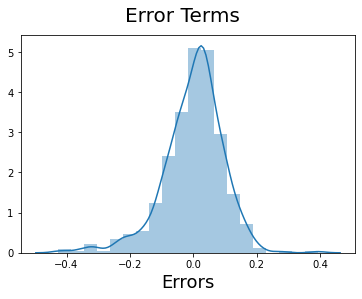

In [95]:
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## making predictions
 - applying scaling on test set

In [96]:
##scaling using normalisation(min/max)
num_var=['temparature','humidity','windspeed','count']
boom_test[var]=scaler.transform(boom_test[num_var])
boom_test.head()

,spring,summer,winter,aug,dec,feb,jan,july,jun,mar,...,wed,Clear,Light Snow,year,holiday,workingday,temparature,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [97]:
y_test=boom_test.pop('count')
X_test=boom_test

In [98]:
X_train_rfe_new.columns

Index(['spring', 'summer', 'winter', 'sep', 'Clear', 'Light Snow', 'year',
       'temparature'],
      dtype='object')

In [99]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
X_test_new.head()

,const,spring,summer,winter,sep,Clear,Light Snow,year,temparature
184,1.0,0,0,0,0,0,0,0,0.831783
535,1.0,0,1,0,0,1,0,1,0.901354
299,1.0,0,0,1,0,0,0,0,0.511964
221,1.0,0,0,0,0,1,0,0,0.881625
152,1.0,0,1,0,0,1,0,0,0.817246


In [101]:
# Making predictions
y_pred = lr_model.predict(X_test_new)

In [102]:
y_pred.head()

184    0.477192
535    0.874564
299    0.418264
221    0.576579
152    0.601902
dtype: float64

 ## Finding R-squared and Adjusted R-Squared for Test set

In [103]:
#from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.783433658813443

In [104]:
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
adj_r2=1-(1-0.749892)*(11-1)/(11-1-1)
print(adj_r2)

0.7221022222222222


## Model Evaluation

Text(0, 0.5, 'y_pred')

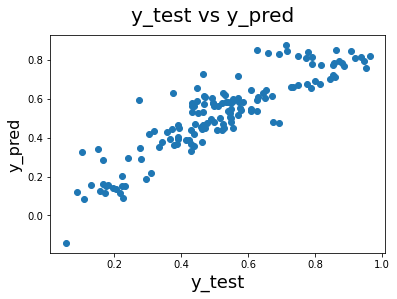

In [105]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

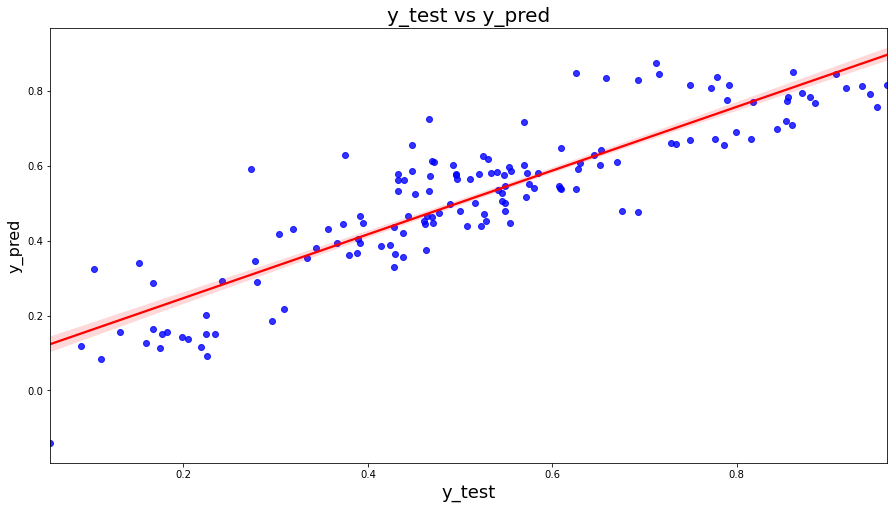

In [106]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

 - eqaution of our best fitted line

 $count=0.0739 \times clear + 0.2297 \times year + 0.0859 \times sep - 0.0663 \times spring +0.0582\times summer +0.1045 \times winter - 0.2277 \times lightsnow + 0.5110 \times
 temparature $

# Final Result Comparison between Train model and Test:

- Train R^2: 0.820
- Train Adjusted R^2:0.817
- Test R^2:0.783
- Test Adjusted R^2:0.722
- Difference in R^2 between train and test:0.037
- Difference in adjusted R^2 between Train and test:0.095 

## Interpretation:

- We can see that temperature variable is having the highest coefficient 0.5110, which means if the temperature increases by one unit the number of bike rentals increases by 0.5110 units.

- We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, light snow  variables with negative coefficient.